In [3]:
import numpy as np

In [4]:
def func(x, y):

    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


In [5]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [15]:
rng = np.random.default_rng()

points = rng.random((1000, 2))
print(np.shape(points))
print(type(points))
print(points)


values = func(points[:,0], points[:,1])
print(np.shape(values))
print(type(values))
print(values)

(1000, 2)
<class 'numpy.ndarray'>
[[0.78907113 0.47668454]
 [0.65105752 0.52076347]
 [0.17127685 0.07177155]
 ...
 [0.10839827 0.43322554]
 [0.24695455 0.67122536]
 [0.8776288  0.00404806]]
(1000,)
<class 'numpy.ndarray'>
[-1.16946199e-02 -5.06178463e-03 -3.26245041e-04  4.52671118e-03
 -1.41865891e-03 -4.58264188e-03 -9.62036289e-02  2.32778247e-01
  2.69660618e-02  1.55536701e-04 -5.23321554e-02  3.25636296e-04
 -5.59543107e-03  1.52969572e-04  2.90640734e-02 -1.20025676e-03
 -2.09827863e-02  1.16433443e-03  6.80212397e-03  2.00724557e-02
  2.31919364e-03  2.17294888e-02 -2.55891831e-03  1.53893400e-03
 -6.30380064e-03  1.22144863e-03  6.75620666e-05 -3.49513870e-02
 -4.94267564e-03 -6.40659023e-07  1.83642606e-01 -2.44907015e-02
  1.60734140e-01 -1.74198919e-01  2.69872561e-03  1.56738714e-03
  1.04117264e-02  1.55851804e-01  6.41963013e-06 -8.08551184e-02
 -1.86856707e-02  1.34306379e-02  8.76864231e-02  9.31517133e-02
  1.03948562e-02  1.66062027e-02 -7.95933710e-02 -2.18380223e-0

In [7]:
from scipy.interpolate import griddata

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

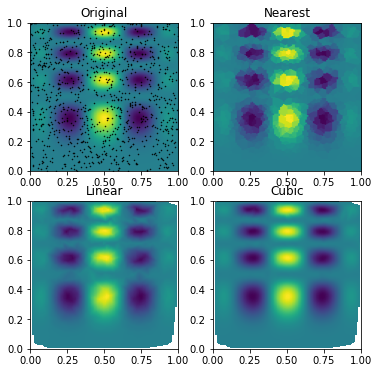

In [8]:
import matplotlib.pyplot as plt

plt.subplot(221)

plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')

plt.plot(points[:,0], points[:,1], 'k.', ms=1)

plt.title('Original')

plt.subplot(222)

plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')

plt.title('Nearest')

plt.subplot(223)

plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')

plt.title('Linear')

plt.subplot(224)

plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')

plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)

plt.show()